# Analisis exploratorio Clinica Red Salud VITACURA



In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skmultiflow.data import WaveformGenerator
from skmultiflow.trees import HoeffdingTree
from skmultiflow.evaluation import EvaluatePrequential
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from skmultiflow.meta import OzaBagging
from joblib import Parallel, delayed

In [3]:
import missingno as msngo
import warnings

from IPython.display import display, Markdown

## Importar Excel:

In [4]:
df = pd.read_excel('C:/Users/yerko/Vitacura.xlsx', sheet_name='Pagos_1'
                   ,parse_dates=['FECHA_INGRESO','FECHA_PAGO'])


In [5]:
df.describe()

,COD_EMPRESA,COD_SUCURSAL,ID_INGRESO,ID_LIQUIDACION,ISAPRE_CODIGO,TOTAL_CLINICA,TOTAL_HMQ,TOTAL_IVA,TOTAL_LIQUIDACION,TRANSACCION_TIPO_CODIGO,...,DESCUENTO_HMQ,TOTAL_AFECTO,TOTAL_EXENTO,ID_PROCESO_CAJA,ID_TRANSACCION,ID_PAGO,FACTURA_RUT_PACIENTE,FACTURA_NOMBRE_PACIENTE,PAGO_NUM_DOCUMENTO,Unnamed: 50
count,114202.0,114202.0,114202.000000,114202.000000,114202.000000,1.142020e+05,1.142020e+05,1.142020e+05,1.142020e+05,108597.000000,...,114202.0,1.142020e+05,1.142020e+05,108597.000000,108597.000000,108597.000000,59618.0,0.0,9.429200e+04,8.000000e+00
mean,3.0,1.0,537186.838829,66265.289286,28790.464624,3.320265e+06,6.597108e+05,4.648492e+05,3.979976e+06,10.222363,...,0.0,2.451217e+06,5.760426e+05,65747.089726,102163.526037,111350.035204,0.0,NaN,6.780164e+10,6.419204e+06
std,0.0,0.0,11972.273171,16408.083362,4958.977553,6.708549e+06,7.877889e+05,9.261077e+05,7.067439e+06,3.470205,...,0.0,4.875418e+06,1.953294e+06,11633.832732,34503.615481,36117.102239,0.0,NaN,1.751023e+11,2.332177e+06
min,3.0,1.0,515806.000000,36301.000000,1.000000,-3.436000e+04,-3.389290e+05,-1.966578e+06,-3.436000e+04,7.000000,...,0.0,-5.202160e+05,0.000000e+00,38885.000000,36625.000000,41543.000000,0.0,NaN,0.000000e+00,3.001393e+06
25%,3.0,1.0,527026.000000,52262.000000,30201.000000,8.137160e+05,4.000000e+00,1.077830e+05,1.079325e+06,7.000000,...,0.0,5.688248e+05,1.370300e+05,56643.000000,72646.000000,80612.000000,0.0,NaN,6.000000e+00,5.170781e+06
50%,3.0,1.0,537357.500000,66848.500000,30201.000000,1.644215e+06,4.592020e+05,2.387880e+05,2.283347e+06,8.000000,...,0.0,1.257760e+06,2.754800e+05,67422.000000,100250.000000,109821.000000,0.0,NaN,5.405148e+07,7.001157e+06
75%,3.0,1.0,547428.000000,80592.000000,30301.000000,3.282376e+06,9.684368e+05,4.551970e+05,4.155483e+06,14.000000,...,0.0,2.399474e+06,5.057525e+05,75756.000000,133059.000000,143566.000000,0.0,NaN,5.231049e+08,7.723920e+06
max,3.0,1.0,559847.000000,96429.000000,30701.000000,2.104812e+08,1.246729e+07,2.913606e+07,2.107831e+08,18.000000,...,0.0,1.528809e+08,1.598453e+08,84039.000000,160488.000000,172308.000000,0.0,NaN,9.018286e+11,9.043270e+06


In [6]:
df = df.drop_duplicates()

In [7]:
df.describe()

,COD_EMPRESA,COD_SUCURSAL,ID_INGRESO,ID_LIQUIDACION,ISAPRE_CODIGO,TOTAL_CLINICA,TOTAL_HMQ,TOTAL_IVA,TOTAL_LIQUIDACION,TRANSACCION_TIPO_CODIGO,...,DESCUENTO_HMQ,TOTAL_AFECTO,TOTAL_EXENTO,ID_PROCESO_CAJA,ID_TRANSACCION,ID_PAGO,FACTURA_RUT_PACIENTE,FACTURA_NOMBRE_PACIENTE,PAGO_NUM_DOCUMENTO,Unnamed: 50
count,114202.0,114202.0,114202.000000,114202.000000,114202.000000,1.142020e+05,1.142020e+05,1.142020e+05,1.142020e+05,108597.000000,...,114202.0,1.142020e+05,1.142020e+05,108597.000000,108597.000000,108597.000000,59618.0,0.0,9.429200e+04,8.000000e+00
mean,3.0,1.0,537186.838829,66265.289286,28790.464624,3.320265e+06,6.597108e+05,4.648492e+05,3.979976e+06,10.222363,...,0.0,2.451217e+06,5.760426e+05,65747.089726,102163.526037,111350.035204,0.0,NaN,6.780164e+10,6.419204e+06
std,0.0,0.0,11972.273171,16408.083362,4958.977553,6.708549e+06,7.877889e+05,9.261077e+05,7.067439e+06,3.470205,...,0.0,4.875418e+06,1.953294e+06,11633.832732,34503.615481,36117.102239,0.0,NaN,1.751023e+11,2.332177e+06
min,3.0,1.0,515806.000000,36301.000000,1.000000,-3.436000e+04,-3.389290e+05,-1.966578e+06,-3.436000e+04,7.000000,...,0.0,-5.202160e+05,0.000000e+00,38885.000000,36625.000000,41543.000000,0.0,NaN,0.000000e+00,3.001393e+06
25%,3.0,1.0,527026.000000,52262.000000,30201.000000,8.137160e+05,4.000000e+00,1.077830e+05,1.079325e+06,7.000000,...,0.0,5.688248e+05,1.370300e+05,56643.000000,72646.000000,80612.000000,0.0,NaN,6.000000e+00,5.170781e+06
50%,3.0,1.0,537357.500000,66848.500000,30201.000000,1.644215e+06,4.592020e+05,2.387880e+05,2.283347e+06,8.000000,...,0.0,1.257760e+06,2.754800e+05,67422.000000,100250.000000,109821.000000,0.0,NaN,5.405148e+07,7.001157e+06
75%,3.0,1.0,547428.000000,80592.000000,30301.000000,3.282376e+06,9.684368e+05,4.551970e+05,4.155483e+06,14.000000,...,0.0,2.399474e+06,5.057525e+05,75756.000000,133059.000000,143566.000000,0.0,NaN,5.231049e+08,7.723920e+06
max,3.0,1.0,559847.000000,96429.000000,30701.000000,2.104812e+08,1.246729e+07,2.913606e+07,2.107831e+08,18.000000,...,0.0,1.528809e+08,1.598453e+08,84039.000000,160488.000000,172308.000000,0.0,NaN,9.018286e+11,9.043270e+06


In [8]:
df['FECHA_PAGO'].describe()

count                  108597
unique                    738
top       2019-02-28 00:00:00
freq                      666
first     2017-01-09 00:00:00
last      2019-12-31 00:00:00
Name: FECHA_PAGO, dtype: object

In [9]:
df['FECHA_INGRESO'].describe()

count                  114202
unique                   1093
top       2018-08-17 00:00:00
freq                      252
first     2017-01-01 00:00:00
last      2019-12-30 00:00:00
Name: FECHA_INGRESO, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114202 entries, 0 to 114201
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   COD_EMPRESA                114202 non-null  int64         
 1   COD_SUCURSAL               114202 non-null  int64         
 2   ID_INGRESO                 114202 non-null  int64         
 3   FECHA_INGRESO              114202 non-null  datetime64[ns]
 4   FECHA_EGRESO               114199 non-null  datetime64[ns]
 5   ID_LIQUIDACION             114202 non-null  int64         
 6   FECHA_LIQUIDACION          114202 non-null  datetime64[ns]
 7   ISAPRE_CODIGO              114202 non-null  int64         
 8   ISAPRE_NOMBRE              114202 non-null  object        
 9   ISAPRE_PLAN                114202 non-null  object        
 10  ISAPRE_NOMBRE_PLAN         98285 non-null   object        
 11  IND_LEY_DE_URGENCIA        114202 non-null  object  

In [11]:
df['ISAPRE_NOMBRE'].value_counts()

ISAPRE CONSALUD               41380
ISAPRE CRUZ BLANCA            24824
ISAPRE COLMENA                18969
ISAPRE BANMEDICA S.A.         11310
PARTICULAR                     5396
FONASA                         5068
ISAPRE VIDA TRES S.A.          4152
ISAPRE NUEVA MAS VIDA S.A.     2769
ISAPRE FUNDACION                115
ISAPRE RIO BLANCO                68
ISALUD CODELCO                   58
ISAPRE CHUQUICAMATA              55
CEPAL                            19
ISAPRE SAN LORENZO               12
ONCOSALUD                         7
Name: ISAPRE_NOMBRE, dtype: int64

In [12]:
#visualizacion de variables

display(Markdown("**Base de datos original**: Tiene {} columnas y {} ".format(df.shape[1], df.shape[0])))
display(Markdown("**Algunas observaciones de la base de datos original**"))
display(df.sample(10,random_state=1314).T)

**Base de datos original**: Tiene 51 columnas y 114202 

**Algunas observaciones de la base de datos original**

,79468,87410,26776,38361,59541,61531,77977,11002,71289,37542
COD_EMPRESA,3,3,3,3,3,3,3,3,3,3
COD_SUCURSAL,1,1,1,1,1,1,1,1,1,1
ID_INGRESO,546758,551678,533763,537214,554346,515835,522706,528365,558636,546312
FECHA_INGRESO,2019-02-08 00:00:00,2019-06-06 00:00:00,2018-04-05 00:00:00,2018-06-25 00:00:00,2019-08-12 00:00:00,2017-01-03 00:00:00,2017-06-27 00:00:00,2017-11-17 00:00:00,2019-11-30 00:00:00,2019-01-29 00:00:00
FECHA_EGRESO,2019-02-09 00:00:00,2019-06-06 00:00:00,2018-04-05 00:00:00,2018-08-17 00:00:00,2019-08-14 00:00:00,2017-01-04 00:00:00,2017-06-29 00:00:00,2017-11-17 00:00:00,2019-12-04 00:00:00,2019-01-31 00:00:00
ID_LIQUIDACION,78361,85374,59930,77365,89235,36510,46581,52864,95933,78192
FECHA_LIQUIDACION,2019-02-12 00:00:00,2019-06-10 00:00:00,2018-04-06 00:00:00,2019-01-25 00:00:00,2019-08-19 00:00:00,2017-01-09 00:00:00,2017-07-31 00:00:00,2017-11-28 00:00:00,2019-12-23 00:00:00,2019-02-07 00:00:00
ISAPRE_CODIGO,30501,30201,30201,30301,30501,30101,30501,10001,30501,30501
ISAPRE_NOMBRE,ISAPRE COLMENA,ISAPRE CONSALUD,ISAPRE CONSALUD,ISAPRE CRUZ BLANCA,ISAPRE COLMENA,ISAPRE BANMEDICA S.A.,ISAPRE COLMENA,PARTICULAR,ISAPRE COLMENA,ISAPRE COLMENA
ISAPRE_PLAN,COLPRE,ONCOSALUDCONSA,ONCOVIDACONSAL,CRUZGESMED,COLL57,BANMVID,COLPRE,BASE,COLCTM,COLL57


<Figure size 288x288 with 0 Axes>

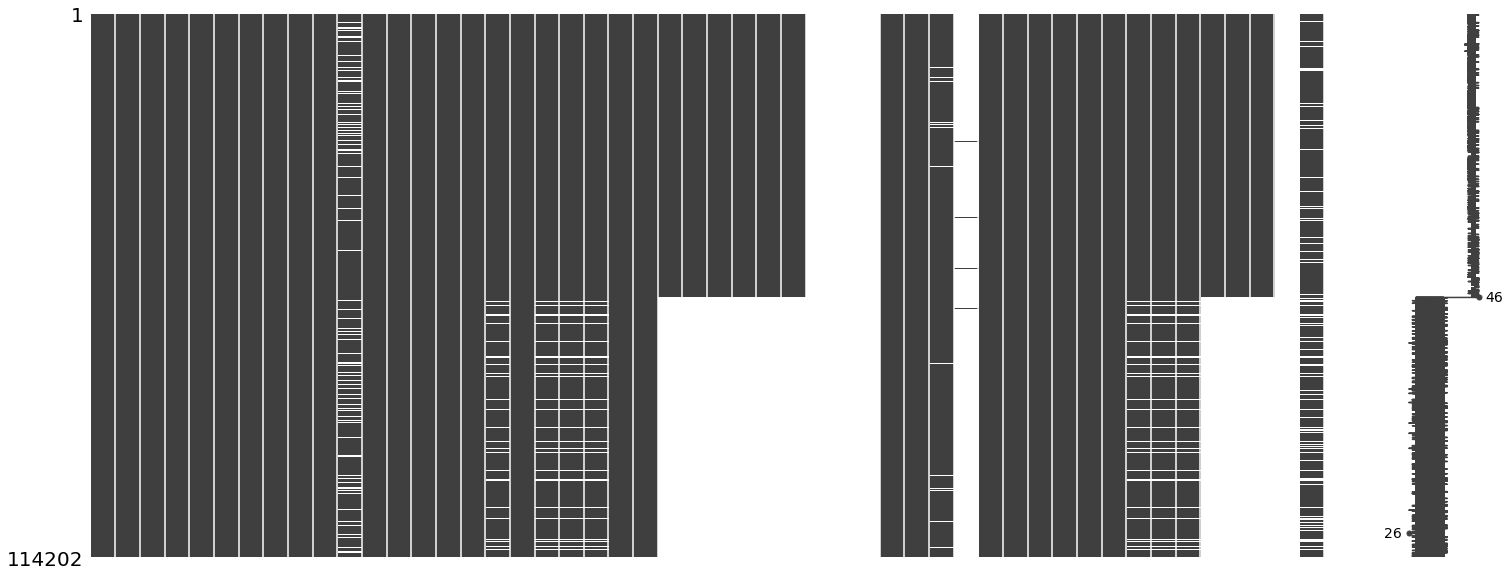

In [13]:
# analisis perdidos

plt.figure(figsize=(4,4))
msngo.matrix(df)

In [14]:
#cuenta cantidad de nulos

df.isnull().sum(axis = 0)

COD_EMPRESA                       0
COD_SUCURSAL                      0
ID_INGRESO                        0
FECHA_INGRESO                     0
FECHA_EGRESO                      3
ID_LIQUIDACION                    0
FECHA_LIQUIDACION                 0
ISAPRE_CODIGO                     0
ISAPRE_NOMBRE                     0
ISAPRE_PLAN                       0
ISAPRE_NOMBRE_PLAN            15917
IND_LEY_DE_URGENCIA               0
TOTAL_CLINICA                     0
TOTAL_HMQ                         0
TOTAL_IVA                         0
TOTAL_LIQUIDACION                 0
TRANSACCION_TIPO_CODIGO        5605
TRANSACCION_TIPO_NOMBRE           0
FECHA_PAGO                     5605
MONTO_PAGADO                   5605
FORMA_PAGO_CODIGO              5605
FORMA_PAGO_NOMBRE                 0
ESTADO_PAGO                       0
CODIGO_EMPRESA_TRIBUTARIA     54584
NOMBRE_EMPRESA_TRIBUTARIA     54584
TIPODOC_FACTURA               54584
TIPODOC_FACTURA_NOMBRE        54584
NRO_FACTURA                 

In [15]:
df_1 = pd.read_excel('C:/Users/yerko/Vitacura.xlsx', sheet_name='Ventas_2')


In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41389 entries, 0 to 41388
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_INGRESO       41389 non-null  object 
 1   TOTAL_CLINICA_F  41388 non-null  float64
dtypes: float64(1), object(1)
memory usage: 646.8+ KB


In [17]:
df_1 = df_1.drop_duplicates()

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41389 entries, 0 to 41388
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_INGRESO       41389 non-null  object 
 1   TOTAL_CLINICA_F  41388 non-null  float64
dtypes: float64(1), object(1)
memory usage: 970.1+ KB


In [19]:
df_2=df.merge(df_1, on = 'ID_INGRESO', how = 'left', indicator=True)  

In [20]:
df_2

,COD_EMPRESA,COD_SUCURSAL,ID_INGRESO,FECHA_INGRESO,FECHA_EGRESO,ID_LIQUIDACION,FECHA_LIQUIDACION,ISAPRE_CODIGO,ISAPRE_NOMBRE,ISAPRE_PLAN,...,ID_TRANSACCION,ID_PAGO,FACTURA_RUT_CLIENTE,FACTURA_NOMBRE_CLIENTE,FACTURA_RUT_PACIENTE,FACTURA_NOMBRE_PACIENTE,PAGO_NUM_DOCUMENTO,Unnamed: 50,TOTAL_CLINICA_F,_merge
0,3,1,515819,2017-01-02,2017-01-03,36477,2017-01-09,20001,FONASA,BASE,...,38382.0,43548.0,61603000-0,FONDO NACIONAL DE SALUD ...,0.0,NaN,342486564.0,NaN,1063334.0,both
1,3,1,515819,2017-01-02,2017-01-03,36477,2017-01-09,20001,FONASA,BASE,...,38382.0,43547.0,61603000-0,FONDO NACIONAL DE SALUD ...,0.0,NaN,34286563.0,NaN,1063334.0,both
2,3,1,515819,2017-01-02,2017-01-03,36477,2017-01-09,20001,FONASA,BASE,...,38382.0,43549.0,61603000-0,FONDO NACIONAL DE SALUD ...,0.0,NaN,342486565.0,NaN,1063334.0,both
3,3,1,515838,2017-01-03,2017-01-03,36540,2017-01-10,10001,PARTICULAR,GESMEDCB,...,36865.0,41819.0,76415957-8,GESMED S.A. ...,0.0,NaN,NaN,NaN,93077.0,both
4,3,1,515839,2017-01-03,2017-01-03,36465,2017-01-09,10001,PARTICULAR,GESMEDCB,...,36678.0,41620.0,76415957-8,GESMED S.A. ...,0.0,NaN,NaN,NaN,85385.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114197,3,1,539864,2018-08-21,2018-08-22,70244,2018-09-12,10001,PARTICULAR,PART-GESMED,...,132496.0,142974.0,NaN,NaN,NaN,NaN,12207628.0,NaN,1164453.0,both
114198,3,1,539864,2018-08-21,2018-08-22,70244,2018-09-12,10001,PARTICULAR,PART-GESMED,...,132495.0,142973.0,NaN,NaN,NaN,NaN,12207627.0,NaN,1164453.0,both
114199,3,1,518963,2017-03-23,2017-05-13,53622,2017-12-13,30301,ISAPRE CRUZ BLANCA,CRUZGESMED,...,82488.0,91048.0,NaN,NaN,NaN,NaN,4010577.0,NaN,47875329.0,both
114200,3,1,535931,2018-05-29,2018-07-29,63950,2018-06-12,30301,ISAPRE CRUZ BLANCA,CRUCN,...,93054.0,102221.0,NaN,NaN,NaN,NaN,4100307.0,NaN,47296581.0,both


In [21]:
df_3_atributos = pd.read_excel('C:/Users/yerko/Vitacura.xlsx', sheet_name='Edad')
#df_3_atributos=df_2

In [22]:
df_3_atributos

,ID_INGRESO,Edad
0,515806,40.0
1,515807,38.0
2,515808,4.0
3,515809,4.0
4,515810,22.0
...,...,...
43637,559879,14.0
43638,559880,65.0
43639,559881,16.0
43640,559882,58.0


In [23]:
df_fin=df_2.merge(df_3_atributos, on = 'ID_INGRESO', how = 'left', indicator=False)  
df_fin#=df_3_atributos

,COD_EMPRESA,COD_SUCURSAL,ID_INGRESO,FECHA_INGRESO,FECHA_EGRESO,ID_LIQUIDACION,FECHA_LIQUIDACION,ISAPRE_CODIGO,ISAPRE_NOMBRE,ISAPRE_PLAN,...,ID_PAGO,FACTURA_RUT_CLIENTE,FACTURA_NOMBRE_CLIENTE,FACTURA_RUT_PACIENTE,FACTURA_NOMBRE_PACIENTE,PAGO_NUM_DOCUMENTO,Unnamed: 50,TOTAL_CLINICA_F,_merge,Edad
0,3,1,515819,2017-01-02,2017-01-03,36477,2017-01-09,20001,FONASA,BASE,...,43548.0,61603000-0,FONDO NACIONAL DE SALUD ...,0.0,NaN,342486564.0,NaN,1063334.0,both,41.0
1,3,1,515819,2017-01-02,2017-01-03,36477,2017-01-09,20001,FONASA,BASE,...,43547.0,61603000-0,FONDO NACIONAL DE SALUD ...,0.0,NaN,34286563.0,NaN,1063334.0,both,41.0
2,3,1,515819,2017-01-02,2017-01-03,36477,2017-01-09,20001,FONASA,BASE,...,43549.0,61603000-0,FONDO NACIONAL DE SALUD ...,0.0,NaN,342486565.0,NaN,1063334.0,both,41.0
3,3,1,515838,2017-01-03,2017-01-03,36540,2017-01-10,10001,PARTICULAR,GESMEDCB,...,41819.0,76415957-8,GESMED S.A. ...,0.0,NaN,NaN,NaN,93077.0,both,60.0
4,3,1,515839,2017-01-03,2017-01-03,36465,2017-01-09,10001,PARTICULAR,GESMEDCB,...,41620.0,76415957-8,GESMED S.A. ...,0.0,NaN,NaN,NaN,85385.0,both,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114197,3,1,539864,2018-08-21,2018-08-22,70244,2018-09-12,10001,PARTICULAR,PART-GESMED,...,142974.0,NaN,NaN,NaN,NaN,12207628.0,NaN,1164453.0,both,83.0
114198,3,1,539864,2018-08-21,2018-08-22,70244,2018-09-12,10001,PARTICULAR,PART-GESMED,...,142973.0,NaN,NaN,NaN,NaN,12207627.0,NaN,1164453.0,both,83.0
114199,3,1,518963,2017-03-23,2017-05-13,53622,2017-12-13,30301,ISAPRE CRUZ BLANCA,CRUZGESMED,...,91048.0,NaN,NaN,NaN,NaN,4010577.0,NaN,47875329.0,both,60.0
114200,3,1,535931,2018-05-29,2018-07-29,63950,2018-06-12,30301,ISAPRE CRUZ BLANCA,CRUCN,...,102221.0,NaN,NaN,NaN,NaN,4100307.0,NaN,47296581.0,both,3.0


In [24]:
df_5_atributos = pd.read_excel('C:/Users/yerko/Vitacura.xlsx', sheet_name='Copago')

In [25]:
df_fin=df_fin.merge(df_5_atributos, on = 'ID_INGRESO', how = 'left', indicator=False)  
df_fin#=df_3_atributos

,COD_EMPRESA,COD_SUCURSAL,ID_INGRESO,FECHA_INGRESO,FECHA_EGRESO,ID_LIQUIDACION,FECHA_LIQUIDACION,ISAPRE_CODIGO,ISAPRE_NOMBRE,ISAPRE_PLAN,...,FACTURA_RUT_CLIENTE,FACTURA_NOMBRE_CLIENTE,FACTURA_RUT_PACIENTE,FACTURA_NOMBRE_PACIENTE,PAGO_NUM_DOCUMENTO,Unnamed: 50,TOTAL_CLINICA_F,_merge,Edad,Copago
0,3,1,515819,2017-01-02,2017-01-03,36477,2017-01-09,20001,FONASA,BASE,...,61603000-0,FONDO NACIONAL DE SALUD ...,0.0,NaN,342486564.0,NaN,1063334.0,both,41.0,993954.0
1,3,1,515819,2017-01-02,2017-01-03,36477,2017-01-09,20001,FONASA,BASE,...,61603000-0,FONDO NACIONAL DE SALUD ...,0.0,NaN,34286563.0,NaN,1063334.0,both,41.0,993954.0
2,3,1,515819,2017-01-02,2017-01-03,36477,2017-01-09,20001,FONASA,BASE,...,61603000-0,FONDO NACIONAL DE SALUD ...,0.0,NaN,342486565.0,NaN,1063334.0,both,41.0,993954.0
3,3,1,515838,2017-01-03,2017-01-03,36540,2017-01-10,10001,PARTICULAR,GESMEDCB,...,76415957-8,GESMED S.A. ...,0.0,NaN,NaN,NaN,93077.0,both,60.0,0.0
4,3,1,515839,2017-01-03,2017-01-03,36465,2017-01-09,10001,PARTICULAR,GESMEDCB,...,76415957-8,GESMED S.A. ...,0.0,NaN,NaN,NaN,85385.0,both,51.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114197,3,1,539864,2018-08-21,2018-08-22,70244,2018-09-12,10001,PARTICULAR,PART-GESMED,...,NaN,NaN,NaN,NaN,12207628.0,NaN,1164453.0,both,83.0,196580.0
114198,3,1,539864,2018-08-21,2018-08-22,70244,2018-09-12,10001,PARTICULAR,PART-GESMED,...,NaN,NaN,NaN,NaN,12207627.0,NaN,1164453.0,both,83.0,196580.0
114199,3,1,518963,2017-03-23,2017-05-13,53622,2017-12-13,30301,ISAPRE CRUZ BLANCA,CRUZGESMED,...,NaN,NaN,NaN,NaN,4010577.0,NaN,47875329.0,both,60.0,645583.0
114200,3,1,535931,2018-05-29,2018-07-29,63950,2018-06-12,30301,ISAPRE CRUZ BLANCA,CRUCN,...,NaN,NaN,NaN,NaN,4100307.0,NaN,47296581.0,both,3.0,6177383.0


In [26]:
df_fin.describe()

,COD_EMPRESA,COD_SUCURSAL,ID_LIQUIDACION,ISAPRE_CODIGO,TOTAL_CLINICA,TOTAL_HMQ,TOTAL_IVA,TOTAL_LIQUIDACION,TRANSACCION_TIPO_CODIGO,MONTO_PAGADO,...,ID_PROCESO_CAJA,ID_TRANSACCION,ID_PAGO,FACTURA_RUT_PACIENTE,FACTURA_NOMBRE_PACIENTE,PAGO_NUM_DOCUMENTO,Unnamed: 50,TOTAL_CLINICA_F,Edad,Copago
count,114202.0,114202.0,114202.000000,114202.000000,1.142020e+05,1.142020e+05,1.142020e+05,1.142020e+05,108597.000000,1.085970e+05,...,108597.000000,108597.000000,108597.000000,59618.0,0.0,9.429200e+04,8.000000e+00,1.141840e+05,114192.000000,1.141840e+05
mean,3.0,1.0,66265.289286,28790.464624,3.320265e+06,6.597108e+05,4.648492e+05,3.979976e+06,10.222363,1.182586e+06,...,65747.089726,102163.526037,111350.035204,0.0,NaN,6.780164e+10,6.419204e+06,3.971909e+06,43.319024,9.115810e+05
std,0.0,0.0,16408.083362,4958.977553,6.708549e+06,7.877889e+05,9.261077e+05,7.067439e+06,3.470205,3.455346e+06,...,11633.832732,34503.615481,36117.102239,0.0,NaN,1.751023e+11,2.332177e+06,1.048814e+07,23.201881,3.285142e+06
min,3.0,1.0,36301.000000,1.000000,-3.436000e+04,-3.389290e+05,-1.966578e+06,-3.436000e+04,7.000000,1.000000e+00,...,38885.000000,36625.000000,41543.000000,0.0,NaN,0.000000e+00,3.001393e+06,-3.436000e+04,1.000000,-1.530280e+07
25%,3.0,1.0,52262.000000,30201.000000,8.137160e+05,4.000000e+00,1.077830e+05,1.079325e+06,7.000000,1.026800e+05,...,56643.000000,72646.000000,80612.000000,0.0,NaN,6.000000e+00,5.170781e+06,8.891380e+05,31.000000,4.638300e+04
50%,3.0,1.0,66848.500000,30201.000000,1.644215e+06,4.592020e+05,2.387880e+05,2.283347e+06,8.000000,3.651660e+05,...,67422.000000,100250.000000,109821.000000,0.0,NaN,5.405148e+07,7.001157e+06,1.730209e+06,42.000000,2.344390e+05
75%,3.0,1.0,80592.000000,30301.000000,3.282376e+06,9.684368e+05,4.551970e+05,4.155483e+06,14.000000,1.083912e+06,...,75756.000000,133059.000000,143566.000000,0.0,NaN,5.231049e+08,7.723920e+06,3.442245e+06,60.000000,7.958682e+05
max,3.0,1.0,96429.000000,30701.000000,2.104812e+08,1.246729e+07,2.913606e+07,2.107831e+08,18.000000,1.185661e+08,...,84039.000000,160488.000000,172308.000000,0.0,NaN,9.018286e+11,9.043270e+06,2.670852e+08,109.000000,2.670852e+08


In [27]:
df_4_atributos = pd.read_excel('C:/Users/yerko/Vitacura.xlsx', sheet_name='tmp312C',
                             parse_dates=['FECHA_INGRESO','FECHA_ALTA'])


In [28]:
df_fin=df_fin.merge(df_4_atributos, on = 'ID_INGRESO', how = 'left', indicator=False)  

<Figure size 288x288 with 0 Axes>

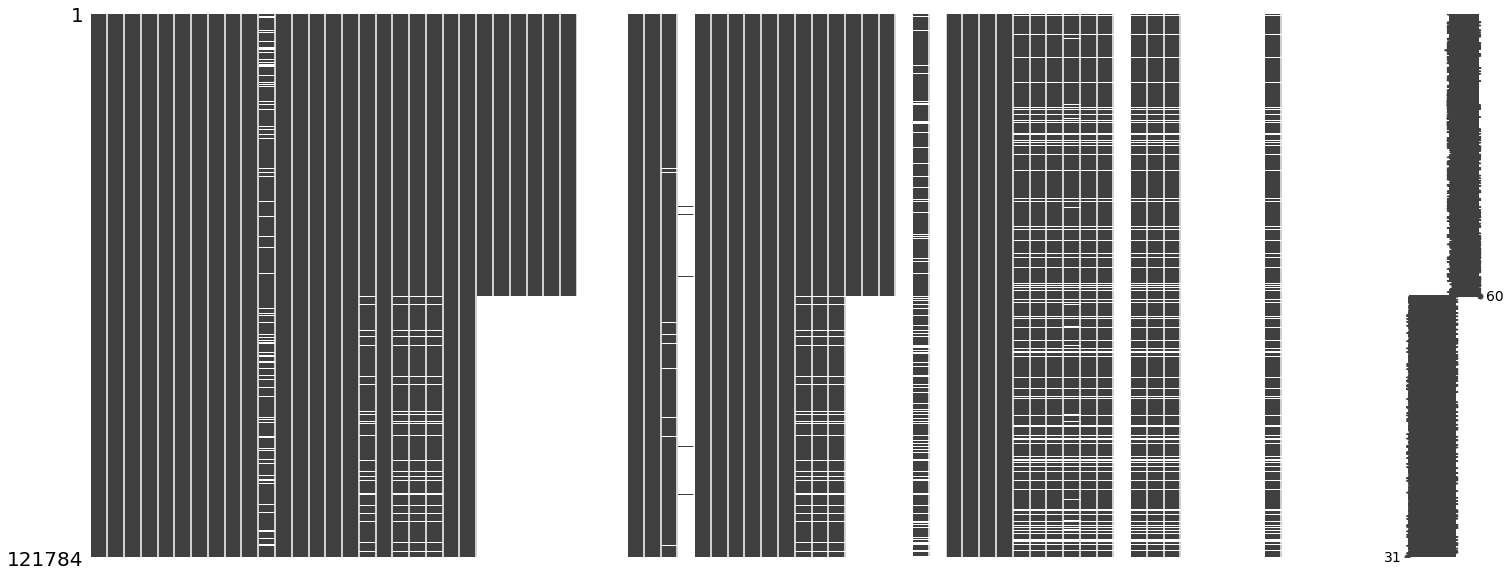

In [29]:
# analisis perdidos

plt.figure(figsize=(4,4))
msngo.matrix(df_fin)

In [30]:
#para ver el tipo de variable

def tipo_variable (DataFrame):
        for i in DataFrame.columns:
           print("La variable {} es de tipo {}.".format(i, DataFrame[i].dtype))
        
tipo_variable(df_fin)

La variable COD_EMPRESA es de tipo int64.
La variable COD_SUCURSAL es de tipo int64.
La variable ID_INGRESO es de tipo object.
La variable FECHA_INGRESO_x es de tipo datetime64[ns].
La variable FECHA_EGRESO es de tipo datetime64[ns].
La variable ID_LIQUIDACION es de tipo int64.
La variable FECHA_LIQUIDACION es de tipo datetime64[ns].
La variable ISAPRE_CODIGO es de tipo int64.
La variable ISAPRE_NOMBRE es de tipo object.
La variable ISAPRE_PLAN es de tipo object.
La variable ISAPRE_NOMBRE_PLAN es de tipo object.
La variable IND_LEY_DE_URGENCIA es de tipo object.
La variable TOTAL_CLINICA es de tipo int64.
La variable TOTAL_HMQ es de tipo int64.
La variable TOTAL_IVA es de tipo int64.
La variable TOTAL_LIQUIDACION es de tipo int64.
La variable TRANSACCION_TIPO_CODIGO es de tipo float64.
La variable TRANSACCION_TIPO_NOMBRE es de tipo object.
La variable FECHA_PAGO es de tipo datetime64[ns].
La variable MONTO_PAGADO es de tipo float64.
La variable FORMA_PAGO_CODIGO es de tipo float64.
La 

In [31]:
df_fin.isnull().sum(axis = 0)

COD_EMPRESA                                                                0
COD_SUCURSAL                                                               0
ID_INGRESO                                                                 0
FECHA_INGRESO_x                                                            0
FECHA_EGRESO                                                               3
                                                                       ...  
Tipo de garantia                                                       17657
Información de garante, edad, estado civil, profesión, comuna, etc    121784
Seguro complementario                                                 121784
Ingreso por (Urgencia, cirugia programada, etc)                       121784
Nacionalidad                                                          121784
Length: 75, dtype: int64

## Crear tiempo de estadia:

In [32]:
#2 calcula el tiempo de estadia de la empresa desde 2008 en dias

#df['Tiempo_Estadia']=abs(df['FECHA_INGRESO'] - df['FECHA_EGRESO'])

In [33]:
#df['Tiempo_Estadia'] =df['Tiempo_Estadia'].astype('timedelta64[D]')

In [34]:
#df['Tiempo_Estadia'].describe()

## Crear tiempo de pago:

In [35]:
df_fin['Tiempo_pago_ingreso']=abs(df_fin['FECHA_INGRESO_x'] - df_fin['FECHA_PAGO'])

In [36]:
df_fin['Tiempo_pago_ingreso'] =df_fin['Tiempo_pago_ingreso'].astype('timedelta64[D]')

In [37]:
## Revisar si es el primer pago *

In [38]:
df_fin['Tiempo_pago_ingreso'].describe()

count    115726.000000
mean        116.118590
std          94.875358
min           0.000000
25%          63.000000
50%          91.000000
75%         138.000000
max        1045.000000
Name: Tiempo_pago_ingreso, dtype: float64

In [39]:
grouped_single = df_fin.groupby('ID_INGRESO').agg({'Tiempo_pago_ingreso': ['mean', 'min', 'max','count','sum','median']})

In [40]:
grouped_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41403 entries, 515806 to 559847
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Tiempo_pago_ingreso, mean)    36184 non-null  float64
 1   (Tiempo_pago_ingreso, min)     36184 non-null  float64
 2   (Tiempo_pago_ingreso, max)     36184 non-null  float64
 3   (Tiempo_pago_ingreso, count)   41403 non-null  int64  
 4   (Tiempo_pago_ingreso, sum)     41403 non-null  float64
 5   (Tiempo_pago_ingreso, median)  36184 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 2.2 MB


In [41]:
grouped_single['Tiempo_pago_ingreso', 'min'].describe()

count    36184.000000
mean        92.005887
std         85.646726
min          0.000000
25%         45.000000
50%         76.000000
75%        108.000000
max       1024.000000
Name: (Tiempo_pago_ingreso, min), dtype: float64

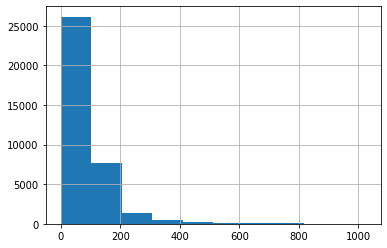

In [42]:
grouped_single['Tiempo_pago_ingreso', 'min'].hist()

In [43]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121784 entries, 0 to 121783
Data columns (total 76 columns):
 #   Column                                                              Non-Null Count   Dtype         
---  ------                                                              --------------   -----         
 0   COD_EMPRESA                                                         121784 non-null  int64         
 1   COD_SUCURSAL                                                        121784 non-null  int64         
 2   ID_INGRESO                                                          121784 non-null  object        
 3   FECHA_INGRESO_x                                                     121784 non-null  datetime64[ns]
 4   FECHA_EGRESO                                                        121781 non-null  datetime64[ns]
 5   ID_LIQUIDACION                                                      121784 non-null  int64         
 6   FECHA_LIQUIDACION                           

In [44]:
df_fin.isnull().sum(axis = 0)

COD_EMPRESA                                                                0
COD_SUCURSAL                                                               0
ID_INGRESO                                                                 0
FECHA_INGRESO_x                                                            0
FECHA_EGRESO                                                               3
                                                                       ...  
Información de garante, edad, estado civil, profesión, comuna, etc    121784
Seguro complementario                                                 121784
Ingreso por (Urgencia, cirugia programada, etc)                       121784
Nacionalidad                                                          121784
Tiempo_pago_ingreso                                                     6058
Length: 76, dtype: int64

In [45]:
grouped_single = df_fin.groupby(['ID_INGRESO'
                                 ,'Tipo Convenio'
                                 ,'ISAPRE_NOMBRE'
                                 ,'ISAPRE_PLAN'
                                # ,'FECHA_INGRESO_x'
                                # ,'Sexo'
                                 ,'Comuna'
                                 #,'Ingreso por (Urgencia, cirugia programada, etc)'
                                 #,'Dignostico de entrada o salida'
                                 
                                 
                                 ,'FECHA_INGRESO_x']).agg({
                                               'Tiempo_pago_ingreso': ['count', 'mean','max']
                                               ,'TOTAL_CLINICA': ['mean']
                                               ,'MONTO_PAGADO':['sum']
                                               ,'Edad':['mean']
                                               ,'Copago':['mean']
                                                                           
                                                                                      })
grouped_single  

Tiempo_pago_ingreso  \
                                                                                                               count   
ID_INGRESO Tipo Convenio  ISAPRE_NOMBRE         ISAPRE_PLAN    Comuna            FECHA_INGRESO_x                       
515806     PREFERENTE     ISAPRE CONSALUD       CONSRED         SANTIAGO         2017-01-01                        3   
515807     LIBRE ELECCIÓN ISAPRE CRUZ BLANCA    CRULIB          LAS CONDES       2017-01-01                        4   
515809     OTRO           PARTICULAR            BASE            LAS CONDES       2017-01-01                        2   
515810     LIBRE ELECCIÓN ISAPRE BANMEDICA S.A. BANMVID         LAS CONDES       2017-01-02                        5   
515811     LIBRE ELECCIÓN ISAPRE BANMEDICA S.A. BANMVID         LAMPA            2017-01-02                        6   
...                                                                                                              ...   
559800     PREFERENTE     ISAPRE CRUZ BLANCA    CRUPRE          LAS CONDES       2019-12-27                        0   
559811     ONCOLÓGICO     ISAPRE CONSALUD       ONCOSALUDCONSA  ESTACION CENTRAL 2019-12-28                        0   
559841     ONCOLÓGICO     ISAPRE CONSALUD       ONCOSALUDCONSA  PUENTE ALTO      2019-12-30                        0   
559842     ONCOLÓGICO     ISAPRE CONSALUD       ONCOSALUDCONSA  HUECHURABA       2019-12-30                        0   
559847     ONCOLÓGICO     ISAPRE CONSALUD       ONCOSALUDCONSA  MAIPU            2019-12-30                        0   

                                                                                                              \
                                                                                                        mean   
ID_INGRESO Tipo Convenio  ISAPRE_NOMBRE         ISAPRE_PLAN    Comuna            FECHA_INGRESO_x               
515806     PREFERENTE     ISAPRE CONSALUD       CONSRED         SANTIAGO         2017-01-01        51.000000   
515807     LIBRE ELECCIÓN ISAPRE CRUZ BLANCA    CRULIB          LAS CONDES       2017-01-01       424.000000   
515809     OTRO           PARTICULAR            BASE            LAS CONDES       2017-01-01        46.000000   
515810     LIBRE ELECCIÓN ISAPRE BANMEDICA S.A. BANMVID         LAS CONDES       2017-01-02        54.600000   
515811     LIBRE ELECCIÓN ISAPRE BANMEDICA S.A. BANMVID         LAMPA            2017-01-02       100.333333   
...                                                                                                      ...   
559800     PREFERENTE     ISAPRE CRUZ BLANCA    CRUPRE          LAS CONDES       2019-12-27              NaN   
559811     ONCOLÓGICO     ISAPRE CONSALUD       ONCOSALUDCONSA  ESTACION CENTRAL 2019-12-28              NaN   
559841     ONCOLÓGICO     ISAPRE CONSALUD       ONCOSALUDCONSA  PUENTE ALTO      2019-12-30              NaN   
559842     ONCOLÓGICO     ISAPRE CONSALUD       ONCOSALUDCONSA  HUECHURABA       2019-12-30              NaN   
559847     ONCOLÓGICO     ISAPRE CONSALUD       ONCOSALUDCONSA  MAIPU            2019-12-30              NaN   

                                                                                                         \
                                                                                                    max   
ID_INGRESO Tipo Convenio  ISAPRE_NOMBRE         ISAPRE_PLAN    Comuna            FECHA_INGRESO_x          
515806     PREFERENTE     ISAPRE CONSALUD       CONSRED         SANTIAGO         2017-01-01        59.0   
515807     LIBRE ELECCIÓN ISAPRE CRUZ BLANCA    CRULIB          LAS CONDES       2017-01-01       437.0   
515809     OTRO           PARTICULAR            BASE            LAS CONDES       2017-01-01        46.0   
515810     LIBRE ELECCIÓN ISAPRE BANMEDICA S.A. BANMVID         LAS CONDES       2017-01-02        57.0   
515811     LIBRE ELECCIÓN ISAPRE BANMEDICA S.A. BANMVID         LAMPA            2017-01-02       

## Renombrar Atributos:

In [46]:
# rename columns
grouped_single.columns = ['Tiempo_pago_ingreso_count','Tiempo_pago_ingreso_mean','Tiempo_pago_ingreso_max'#,'Tiempo_pago_ingreso'
                          ,'TOTAL_CLINICA','MONTO_PAGADO'
                          ,'Edad','Copago_mean']

# reset index to get grouped columns back
grouped_single = grouped_single.reset_index()

#df_clean=df_fin_2.loc[df_fin_2['Edad']>=18 ]grouped_single

In [47]:
grouped_single=grouped_single.loc[grouped_single['TOTAL_CLINICA']>= grouped_single['MONTO_PAGADO']]


In [48]:
grouped_single=grouped_single.loc[grouped_single['TOTAL_CLINICA']>0]

In [51]:
grouped_single

,ID_INGRESO,Tipo Convenio,ISAPRE_NOMBRE,ISAPRE_PLAN,Comuna,FECHA_INGRESO_x,Tiempo_pago_ingreso_count,Tiempo_pago_ingreso_mean,Tiempo_pago_ingreso_max,TOTAL_CLINICA,MONTO_PAGADO,Edad,Copago_mean
3,515810,LIBRE ELECCIÓN,ISAPRE BANMEDICA S.A.,BANMVID,LAS CONDES,2017-01-02,5,54.6,57.0,8179566.0,8179566.0,22.0,2040382.0
5,515812,LIBRE ELECCIÓN,ISAPRE VIDA TRES S.A.,VIDA3LE,VITACURA,2017-01-02,2,37.5,43.0,1107815.0,1107815.0,26.0,101512.0
6,515815,ONCOLÓGICO,ISAPRE CRUZ BLANCA,ONCOSALUDCB,PUDAHUEL,2017-01-02,1,176.0,176.0,1379967.0,1379967.0,47.0,0.0
8,515818,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,PROVIDENCIA,2017-01-02,1,296.0,296.0,730084.0,730084.0,43.0,0.0
9,515819,LIBRE ELECCIÓN,FONASA,BASE,SAN MIGUEL,2017-01-02,4,24.0,24.0,1063334.0,1063334.0,41.0,993954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,559800,PREFERENTE,ISAPRE CRUZ BLANCA,CRUPRE,LAS CONDES,2019-12-27,0,NaN,NaN,1230521.0,0.0,1.0,1230521.0
34325,559811,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,ESTACION CENTRAL,2019-12-28,0,NaN,NaN,99754.0,0.0,65.0,99754.0
34326,559841,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,PUENTE ALTO,2019-12-30,0,NaN,NaN,218150.0,0.0,25.0,218150.0
34327,559842,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,HUECHURABA,2019-12-30,0,NaN,NaN,203174.0,0.0,40.0,203174.0


In [59]:
#df_clean2

In [60]:
tipo_variable(grouped_single)
grouped_single.info()

La variable ID_INGRESO es de tipo int64.
La variable Tipo Convenio es de tipo object.
La variable ISAPRE_NOMBRE es de tipo object.
La variable ISAPRE_PLAN es de tipo object.
La variable Comuna es de tipo object.
La variable FECHA_INGRESO_x es de tipo datetime64[ns].
La variable Tiempo_pago_ingreso_count es de tipo int64.
La variable Tiempo_pago_ingreso_mean es de tipo float64.
La variable Tiempo_pago_ingreso_max es de tipo float64.
La variable TOTAL_CLINICA es de tipo float64.
La variable MONTO_PAGADO es de tipo float64.
La variable Edad es de tipo float64.
La variable Copago_mean es de tipo float64.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 3 to 34328
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID_INGRESO                 13274 non-null  int64         
 1   Tipo Convenio              13274 non-null  object        
 2   ISAPRE_NOMBRE             

In [61]:
grouped_single.head()np.

,ID_INGRESO,Tipo Convenio,ISAPRE_NOMBRE,ISAPRE_PLAN,Comuna,FECHA_INGRESO_x,Tiempo_pago_ingreso_count,Tiempo_pago_ingreso_mean,Tiempo_pago_ingreso_max,TOTAL_CLINICA,MONTO_PAGADO,Edad,Copago_mean
3,515810,LIBRE ELECCIÓN,ISAPRE BANMEDICA S.A.,BANMVID,LAS CONDES,2017-01-02,5,54.6,57.0,8179566.0,8179566.0,22.0,2040382.0
5,515812,LIBRE ELECCIÓN,ISAPRE VIDA TRES S.A.,VIDA3LE,VITACURA,2017-01-02,2,37.5,43.0,1107815.0,1107815.0,26.0,101512.0
6,515815,ONCOLÓGICO,ISAPRE CRUZ BLANCA,ONCOSALUDCB,PUDAHUEL,2017-01-02,1,176.0,176.0,1379967.0,1379967.0,47.0,0.0
8,515818,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,PROVIDENCIA,2017-01-02,1,296.0,296.0,730084.0,730084.0,43.0,0.0
9,515819,LIBRE ELECCIÓN,FONASA,BASE,SAN MIGUEL,2017-01-02,4,24.0,24.0,1063334.0,1063334.0,41.0,993954.0


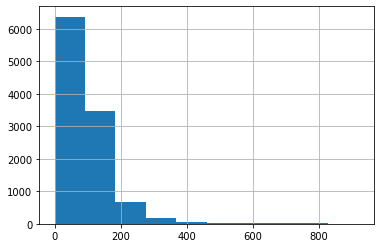

In [62]:
grouped_single['Tiempo_pago_ingreso_mean'].hist()

In [63]:
grouped_single['Tiempo_pago_ingreso_mean'].describe()

count    10875.000000
mean        91.541256
std         93.519198
min          0.000000
25%         14.000000
50%         81.000000
75%        126.500000
max        920.500000
Name: Tiempo_pago_ingreso_mean, dtype: float64

In [64]:
grouped_single.head()

,ID_INGRESO,Tipo Convenio,ISAPRE_NOMBRE,ISAPRE_PLAN,Comuna,FECHA_INGRESO_x,Tiempo_pago_ingreso_count,Tiempo_pago_ingreso_mean,Tiempo_pago_ingreso_max,TOTAL_CLINICA,MONTO_PAGADO,Edad,Copago_mean
3,515810,LIBRE ELECCIÓN,ISAPRE BANMEDICA S.A.,BANMVID,LAS CONDES,2017-01-02,5,54.6,57.0,8179566.0,8179566.0,22.0,2040382.0
5,515812,LIBRE ELECCIÓN,ISAPRE VIDA TRES S.A.,VIDA3LE,VITACURA,2017-01-02,2,37.5,43.0,1107815.0,1107815.0,26.0,101512.0
6,515815,ONCOLÓGICO,ISAPRE CRUZ BLANCA,ONCOSALUDCB,PUDAHUEL,2017-01-02,1,176.0,176.0,1379967.0,1379967.0,47.0,0.0
8,515818,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,PROVIDENCIA,2017-01-02,1,296.0,296.0,730084.0,730084.0,43.0,0.0
9,515819,LIBRE ELECCIÓN,FONASA,BASE,SAN MIGUEL,2017-01-02,4,24.0,24.0,1063334.0,1063334.0,41.0,993954.0


In [65]:
df_fin_1=grouped_single

In [66]:
df_fin_1['Copago_mean'].describe()

count    1.327400e+04
mean     8.486323e+05
std      4.104843e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.049192e+05
max      2.379350e+08
Name: Copago_mean, dtype: float64

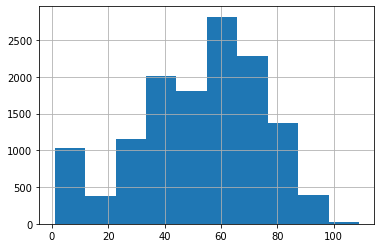

In [67]:
df_fin_1['Edad'].hist()

In [68]:
df_fin_1['FECHA_INGRESO_x'].describe()

count                   13274
unique                   1040
top       2019-11-25 00:00:00
freq                       46
first     2017-01-02 00:00:00
last      2019-12-30 00:00:00
Name: FECHA_INGRESO_x, dtype: object

In [69]:
df_fin_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 3 to 34328
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID_INGRESO                 13274 non-null  int64         
 1   Tipo Convenio              13274 non-null  object        
 2   ISAPRE_NOMBRE              13274 non-null  object        
 3   ISAPRE_PLAN                13274 non-null  object        
 4   Comuna                     13274 non-null  object        
 5   FECHA_INGRESO_x            13274 non-null  datetime64[ns]
 6   Tiempo_pago_ingreso_count  13274 non-null  int64         
 7   Tiempo_pago_ingreso_mean   10875 non-null  float64       
 8   Tiempo_pago_ingreso_max    10875 non-null  float64       
 9   TOTAL_CLINICA              13274 non-null  float64       
 10  MONTO_PAGADO               13274 non-null  float64       
 11  Edad                       13274 non-null  float64       
 12  Copa

In [70]:
df_clean=df_fin_1

In [71]:
df_fin_2=df_clean

In [72]:
df_fin_2.head()

,ID_INGRESO,Tipo Convenio,ISAPRE_NOMBRE,ISAPRE_PLAN,Comuna,FECHA_INGRESO_x,Tiempo_pago_ingreso_count,Tiempo_pago_ingreso_mean,Tiempo_pago_ingreso_max,TOTAL_CLINICA,MONTO_PAGADO,Edad,Copago_mean
3,515810,LIBRE ELECCIÓN,ISAPRE BANMEDICA S.A.,BANMVID,LAS CONDES,2017-01-02,5,54.6,57.0,8179566.0,8179566.0,22.0,2040382.0
5,515812,LIBRE ELECCIÓN,ISAPRE VIDA TRES S.A.,VIDA3LE,VITACURA,2017-01-02,2,37.5,43.0,1107815.0,1107815.0,26.0,101512.0
6,515815,ONCOLÓGICO,ISAPRE CRUZ BLANCA,ONCOSALUDCB,PUDAHUEL,2017-01-02,1,176.0,176.0,1379967.0,1379967.0,47.0,0.0
8,515818,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,PROVIDENCIA,2017-01-02,1,296.0,296.0,730084.0,730084.0,43.0,0.0
9,515819,LIBRE ELECCIÓN,FONASA,BASE,SAN MIGUEL,2017-01-02,4,24.0,24.0,1063334.0,1063334.0,41.0,993954.0


In [73]:
df_fin_2['ISAPRE_NOMBRE'].value_counts()

ISAPRE CONSALUD               6221
PARTICULAR                    3055
ISAPRE CRUZ BLANCA            1611
ISAPRE COLMENA                 972
FONASA                         524
ISAPRE BANMEDICA S.A.          451
ISAPRE VIDA TRES S.A.          206
ISAPRE NUEVA MAS VIDA S.A.     205
ISAPRE FUNDACION                19
ISAPRE RIO BLANCO                7
CEPAL                            1
ONCOSALUD                        1
ISAPRE CHUQUICAMATA              1
Name: ISAPRE_NOMBRE, dtype: int64

## Crear PREVISION_2:

In [74]:
df_fin_2['PREVISION_2'] = 'OTRA'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'FONASA', 'PREVISION_2'] ='FONASA'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'MUTUAL DE SEGURIDAD C.CH.C.', 'PREVISION_2'] ='MUTUAL DE SEGURIDAD C.CH.C.'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'ASOCIACION CHILENA DE SEGURIDAD', 'PREVISION_2'] ='ASOCIACION CHILENA DE SEGURIDAD'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'PARTICULAR', 'PREVISION_2'] ='PARTICULAR'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'ISAPRE CONSALUD', 'PREVISION_2'] ='ISAPRE CONSALUD S.A.'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'DIR. PREVISION DE CARABINEROS DE CHILE', 'PREVISION_2'] ='DIRECCIÓN DE PREVISIÓN DE CARABINEROS'

df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'ISAPRE COLMENA', 'PREVISION_2'] ='ISAPRE COLMENA GOLDEN CROSS S.A.'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'ISAPRE COLMENA GOLDEN CROSS S.A.', 'PREVISION_2'] ='ISAPRE COLMENA GOLDEN CROSS S.A.'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'DIRECCION DE PREVISION DE CARABINEROS', 'PREVISION_2'] ='DIRECCIÓN DE PREVISIÓN DE CARABINEROS'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'ISAPRE CRUZ BLANCA', 'PREVISION_2'] ='CRUZ BLANCA S.A.'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'ISAPRE BANMEDICA S.A.','PREVISION_2'] ='ISAPRE BANMEDICA SA'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'INSTITUTO DE SEGURIDAD DEL TRABAJO', 'PREVISION_2'] ='INSTITUTO DE SEGURIDAD LABORAL'

df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'NUEVA MASVIDA S.A', 'PREVISION_2'] ='NUEVA MASVIDA S.A.'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'ISAPRE NUEVA MAS VIDA S.A.', 'PREVISION_2'] ='NUEVA MASVIDA S.A.'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'ISAPRE MASVIDA SA', 'PREVISION_2'] ='NUEVA MASVIDA S.A.'
df_fin_2.loc[df_fin_2['ISAPRE_NOMBRE'] == 'ISAPRE MAS VIDA', 'PREVISION_2'] ='NUEVA MASVIDA S.A.'


In [75]:
df_fin_2['PREVISION_2'].value_counts()

ISAPRE CONSALUD S.A.                6221
PARTICULAR                          3055
CRUZ BLANCA S.A.                    1611
ISAPRE COLMENA GOLDEN CROSS S.A.     972
FONASA                               524
ISAPRE BANMEDICA SA                  451
OTRA                                 235
NUEVA MASVIDA S.A.                   205
Name: PREVISION_2, dtype: int64

In [76]:
df_fin_2=df_fin_2.loc[df_fin_2['PREVISION_2']!='OTRA' ]

In [77]:
df_fin_2['PREVISION_2'].value_counts()

ISAPRE CONSALUD S.A.                6221
PARTICULAR                          3055
CRUZ BLANCA S.A.                    1611
ISAPRE COLMENA GOLDEN CROSS S.A.     972
FONASA                               524
ISAPRE BANMEDICA SA                  451
NUEVA MASVIDA S.A.                   205
Name: PREVISION_2, dtype: int64

## Crear Tipo Convenio:

In [78]:
df_fin_2['Tipo Convenio'].value_counts()

ONCOLÓGICO        4541
GES               3978
LIBRE ELECCIÓN    2216
PREFERENTE        1552
GRD                422
OTRO               328
PAD FONASA           2
Name: Tipo Convenio, dtype: int64

In [138]:
df_fin_2=df_fin_2.loc[df_fin_2['Tipo Convenio']!='PAD FONASA' ]

In [139]:
df_fin_2['Tipo Convenio_2'] = df_fin_2['Tipo Convenio']


In [140]:
df_fin_2['Tipo Convenio_2'].value_counts()

ONCOLÓGICO        4541
GES               3978
LIBRE ELECCIÓN    2216
PREFERENTE        1552
GRD                422
OTRO               328
Name: Tipo Convenio_2, dtype: int64

## Crear Diagnostico Salida:

In [141]:
#df_fin_2['Diagnóstico Salida'].value_counts().head

In [142]:
#df_fin_2['DIAGNOSTICO_2'].value_counts()

In [143]:
df_fin_2

,ID_INGRESO,Tipo Convenio,ISAPRE_NOMBRE,ISAPRE_PLAN,Comuna,FECHA_INGRESO_x,Tiempo_pago_ingreso_count,Tiempo_pago_ingreso_mean,Tiempo_pago_ingreso_max,TOTAL_CLINICA,MONTO_PAGADO,Edad,Copago_mean,PREVISION_2,Tipo Convenio_2
3,515810,LIBRE ELECCIÓN,ISAPRE BANMEDICA S.A.,BANMVID,LAS CONDES,2017-01-02,5,54.6,57.0,8179566.0,8179566.0,22.0,2040382.0,ISAPRE BANMEDICA SA,LIBRE ELECCIÓN
6,515815,ONCOLÓGICO,ISAPRE CRUZ BLANCA,ONCOSALUDCB,PUDAHUEL,2017-01-02,1,176.0,176.0,1379967.0,1379967.0,47.0,0.0,CRUZ BLANCA S.A.,ONCOLÓGICO
8,515818,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,PROVIDENCIA,2017-01-02,1,296.0,296.0,730084.0,730084.0,43.0,0.0,ISAPRE CONSALUD S.A.,ONCOLÓGICO
9,515819,LIBRE ELECCIÓN,FONASA,BASE,SAN MIGUEL,2017-01-02,4,24.0,24.0,1063334.0,1063334.0,41.0,993954.0,FONASA,LIBRE ELECCIÓN
14,515827,LIBRE ELECCIÓN,ISAPRE CRUZ BLANCA,CRULIB,ARICA,2017-01-03,2,79.5,90.0,2003330.0,2003330.0,29.0,602909.0,CRUZ BLANCA S.A.,LIBRE ELECCIÓN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,559800,PREFERENTE,ISAPRE CRUZ BLANCA,CRUPRE,LAS CONDES,2019-12-27,0,NaN,NaN,1230521.0,0.0,1.0,1230521.0,CRUZ BLANCA S.A.,PREFERENTE
34325,559811,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,ESTACION CENTRAL,2019-12-28,0,NaN,NaN,99754.0,0.0,65.0,99754.0,ISAPRE CONSALUD S.A.,ONCOLÓGICO
34326,559841,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,PUENTE ALTO,2019-12-30,0,NaN,NaN,218150.0,0.0,25.0,218150.0,ISAPRE CONSALUD S.A.,ONCOLÓGICO
34327,559842,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,HUECHURABA,2019-12-30,0,NaN,NaN,203174.0,0.0,40.0,203174.0,ISAPRE CONSALUD S.A.,ONCOLÓGICO


In [144]:
#df_fin_2.to_excel('C:/Users/yerko/datos_anteriores_rancagua.xlsx')

## Definir tramo Edad:

In [145]:
df_clean=df_fin_2.loc[df_fin_2['Edad']>=18 ]

In [146]:
df_clean['TRAMO_EDAD'] = 'Unknown'
df_clean.loc[df_clean['Edad'].between(18, 30, inclusive=True), 'TRAMO_EDAD'] = '18-30'
df_clean.loc[df_clean['Edad'].between(31, 40, inclusive=True), 'TRAMO_EDAD'] = '30-40'
df_clean.loc[df_clean['Edad'].between(41, 50, inclusive=True), 'TRAMO_EDAD'] = '40-50'
df_clean.loc[df_clean['Edad'].between(51, 60, inclusive=True), 'TRAMO_EDAD'] = '50-60'
df_clean.loc[df_clean['Edad'].between(61, 70, inclusive=True), 'TRAMO_EDAD'] = '60-70'
df_clean.loc[df_clean['Edad'].between(71, 120, inclusive=True), 'TRAMO_EDAD'] = '70<'


In [147]:
df_clean['TRAMO_EDAD'].value_counts()

70<      2793
60-70    2645
50-60    2122
40-50    1721
30-40    1694
18-30     984
Name: TRAMO_EDAD, dtype: int64

In [148]:
df_clean.head()

,ID_INGRESO,Tipo Convenio,ISAPRE_NOMBRE,ISAPRE_PLAN,Comuna,FECHA_INGRESO_x,Tiempo_pago_ingreso_count,Tiempo_pago_ingreso_mean,Tiempo_pago_ingreso_max,TOTAL_CLINICA,MONTO_PAGADO,Edad,Copago_mean,PREVISION_2,Tipo Convenio_2,TRAMO_EDAD
3,515810,LIBRE ELECCIÓN,ISAPRE BANMEDICA S.A.,BANMVID,LAS CONDES,2017-01-02,5,54.6,57.0,8179566.0,8179566.0,22.0,2040382.0,ISAPRE BANMEDICA SA,LIBRE ELECCIÓN,18-30
6,515815,ONCOLÓGICO,ISAPRE CRUZ BLANCA,ONCOSALUDCB,PUDAHUEL,2017-01-02,1,176.0,176.0,1379967.0,1379967.0,47.0,0.0,CRUZ BLANCA S.A.,ONCOLÓGICO,40-50
8,515818,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,PROVIDENCIA,2017-01-02,1,296.0,296.0,730084.0,730084.0,43.0,0.0,ISAPRE CONSALUD S.A.,ONCOLÓGICO,40-50
9,515819,LIBRE ELECCIÓN,FONASA,BASE,SAN MIGUEL,2017-01-02,4,24.0,24.0,1063334.0,1063334.0,41.0,993954.0,FONASA,LIBRE ELECCIÓN,40-50
14,515827,LIBRE ELECCIÓN,ISAPRE CRUZ BLANCA,CRULIB,ARICA,2017-01-03,2,79.5,90.0,2003330.0,2003330.0,29.0,602909.0,CRUZ BLANCA S.A.,LIBRE ELECCIÓN,18-30


In [149]:
df_clean['PREVISION_2'].value_counts()

ISAPRE CONSALUD S.A.                5844
PARTICULAR                          3035
CRUZ BLANCA S.A.                    1362
ISAPRE COLMENA GOLDEN CROSS S.A.     763
FONASA                               441
ISAPRE BANMEDICA SA                  334
NUEVA MASVIDA S.A.                   180
Name: PREVISION_2, dtype: int64

In [150]:
df_clean['Tipo Convenio_2'].value_counts()

ONCOLÓGICO        4534
GES               3907
LIBRE ELECCIÓN    1825
PREFERENTE        1066
GRD                318
OTRO               309
Name: Tipo Convenio_2, dtype: int64

## Tramo Copago

In [151]:
df_clean['TRAMO_COPAGO'] = 'Unknown'
df_clean.loc[df_clean['Copago_mean'].between(0, 250000, inclusive=True), 'TRAMO_COPAGO'] = 'I'
df_clean.loc[df_clean['Copago_mean'].between(250001, 500000, inclusive=True), 'TRAMO_COPAGO'] = 'II'
df_clean.loc[df_clean['Copago_mean'].between(500001, 1000000, inclusive=True), 'TRAMO_COPAGO'] = 'III'
df_clean.loc[df_clean['Copago_mean'].between(1000001, 2500000, inclusive=True), 'TRAMO_COPAGO'] = 'IV'
df_clean.loc[df_clean['Copago_mean'].between(2500001, 7000000000, inclusive=True), 'TRAMO_COPAGO'] = 'V'

In [152]:
df_clean['TRAMO_COPAGO'].value_counts()

I      8777
IV     1039
V       909
III     674
II      560
Name: TRAMO_COPAGO, dtype: int64

In [153]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11959 entries, 3 to 34328
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID_INGRESO                 11959 non-null  int64         
 1   Tipo Convenio              11959 non-null  object        
 2   ISAPRE_NOMBRE              11959 non-null  object        
 3   ISAPRE_PLAN                11959 non-null  object        
 4   Comuna                     11959 non-null  object        
 5   FECHA_INGRESO_x            11959 non-null  datetime64[ns]
 6   Tiempo_pago_ingreso_count  11959 non-null  int64         
 7   Tiempo_pago_ingreso_mean   9867 non-null   float64       
 8   Tiempo_pago_ingreso_max    9867 non-null   float64       
 9   TOTAL_CLINICA              11959 non-null  float64       
 10  MONTO_PAGADO               11959 non-null  float64       
 11  Edad                       11959 non-null  float64       
 12  Copa

In [154]:
df_clean = df_clean.drop_duplicates()

# Tramos Finales con 98% de pago y tramos de dias de pago

## Solo 98% pago:

In [155]:
df_clean['%pago>98%']=np.where(df_clean['MONTO_PAGADO']/df_clean['TOTAL_CLINICA']>0.98 ,'0','1')

In [156]:
df_clean['%pago>98%'].value_counts()

0    9413
1    2546
Name: %pago>98%, dtype: int64

In [157]:
df_clean['%pago>98%'].value_counts()[1]/(df_clean['%pago>98%'].value_counts()[0]+df_clean['%pago>98%'].value_counts()[1])


0.21289405468684672

# Pago 98% y dias de pago menor a 90 dias:

In [158]:
df_clean['%pago>98%_<90_dias']=np.where((df_clean['MONTO_PAGADO']/df_clean['TOTAL_CLINICA']>0.98) & (df_clean['Tiempo_pago_ingreso_max']<90) ,'0','1')

In [159]:
df_clean['%pago>98%_<90_dias'].value_counts()

1    7001
0    4958
Name: %pago>98%_<90_dias, dtype: int64

In [160]:
df_clean['%pago>98%_<90_dias'].value_counts()[1]/(df_clean['%pago>98%_<90_dias'].value_counts()[1]+df_clean['%pago>98%_<90_dias'].value_counts()[0])

0.4145831591270173

# Pago 98% y dias de pago menor a 120 dias:

In [161]:
df_clean['%pago>98%_<120_dias']=np.where((df_clean['MONTO_PAGADO']/df_clean['TOTAL_CLINICA']>0.98) & (df_clean['Tiempo_pago_ingreso_max']<120) ,'0','1')

In [162]:
df_clean['%pago>98%_<120_dias'].value_counts()

0    6515
1    5444
Name: %pago>98%_<120_dias, dtype: int64

In [163]:
df_clean['%pago>98%_<120_dias'].value_counts()[1]/(df_clean['%pago>98%_<120_dias'].value_counts()[1]+df_clean['%pago>98%_<120_dias'].value_counts()[0])

0.45522200852914124

# Pago 98% y dias de pago menor a 140 dias:

In [164]:
df_clean['%pago>98%_<140_dias']=np.where((df_clean['MONTO_PAGADO']/df_clean['TOTAL_CLINICA']>0.98) & (df_clean['Tiempo_pago_ingreso_max']<140) ,'0','1')

In [165]:
df_clean['%pago>98%_<140_dias'].value_counts()

0    7155
1    4804
Name: %pago>98%_<140_dias, dtype: int64

In [166]:
df_clean['%pago>98%_<140_dias'].value_counts()[1]/(df_clean['%pago>98%_<140_dias'].value_counts()[1]+df_clean['%pago>98%_<140_dias'].value_counts()[0])

0.4017058282465089

# Pago 98% y dias de pago menor a 180 dias:

In [167]:
df_clean['%pago>98%_<180_dias']=np.where((df_clean['MONTO_PAGADO']/df_clean['TOTAL_CLINICA']>0.98) & (df_clean['Tiempo_pago_ingreso_max']<180) ,'0','1')

In [168]:
df_clean['%pago>98%_<180_dias'].value_counts()

0    8125
1    3834
Name: %pago>98%_<180_dias, dtype: int64

In [169]:
df_clean['%pago>98%_<180_dias'].value_counts()[1]

3834

In [170]:
df_clean['%pago>98%_<180_dias'].value_counts()[0]

8125

In [171]:
df_clean['%pago>98%_<180_dias'].value_counts()[1]/(df_clean['%pago>98%_<180_dias'].value_counts()[0]+df_clean['%pago>98%_<180_dias'].value_counts()[1])

0.32059536750564427

# Pago 98% y dias de pago menor a 240 dias:

In [172]:
df_clean['%pago>98%_<240_dias']=np.where((df_clean['MONTO_PAGADO']/df_clean['TOTAL_CLINICA']>0.98) & (df_clean['Tiempo_pago_ingreso_max']<240) ,'0','1')

In [173]:
df_clean['%pago>98%_<240_dias'].value_counts()

0    8802
1    3157
Name: %pago>98%_<240_dias, dtype: int64

In [174]:
df_clean['%pago>98%_<240_dias'].value_counts()[1]/(df_clean['%pago>98%_<240_dias'].value_counts()[0]+df_clean['%pago>98%_<240_dias'].value_counts()[1])

0.2639852830504223

# Pago 98% y dias de pago menor a 270 dias:

In [175]:
# Pago 98% y dias de pago menor a 240 dias:

In [176]:
df_clean['%pago>98%_<270_dias']=np.where((df_clean['MONTO_PAGADO']/df_clean['TOTAL_CLINICA']>0.98) & (df_clean['Tiempo_pago_ingreso_max']<270) ,'0','1')

In [177]:
df_clean['%pago>98%_<270_dias'].value_counts()

0    8961
1    2998
Name: %pago>98%_<270_dias, dtype: int64

In [178]:
df_clean['%pago>98%_<270_dias'].value_counts()[1]/(df_clean['%pago>98%_<270_dias'].value_counts()[0]+df_clean['%pago>98%_<270_dias'].value_counts()[1])

0.2506898570114558

# Pago 98% y dias de pago menor a 300 dias:

In [179]:
# Pago 98% y dias de pago menor a 240 dias:

In [180]:
df_clean['%pago>98%_<300_dias']=np.where((df_clean['MONTO_PAGADO']/df_clean['TOTAL_CLINICA']>0.98) & (df_clean['Tiempo_pago_ingreso_max']<300) ,'0','1')

In [181]:
df_clean['%pago>98%_<300_dias'].value_counts()

0    9061
1    2898
Name: %pago>98%_<300_dias, dtype: int64

In [182]:
df_clean['%pago>98%_<300_dias'].value_counts()[1]/(df_clean['%pago>98%_<300_dias'].value_counts()[0]+df_clean['%pago>98%_<300_dias'].value_counts()[1])

0.2423279538422945

# Pago 98% y dias de pago menor a 360 dias:

In [183]:
# Pago 98% y dias de pago menor a 240 dias:

In [184]:
df_clean['%pago>98%_<360_dias']=np.where((df_clean['MONTO_PAGADO']/df_clean['TOTAL_CLINICA']>0.98) & (df_clean['Tiempo_pago_ingreso_max']<360) ,'0','1')

In [185]:
df_clean['%pago>98%_<360_dias'].value_counts()

0    9206
1    2753
Name: %pago>98%_<360_dias, dtype: int64

In [186]:
df_clean['%pago>98%_<360_dias'].value_counts()[1]/(df_clean['%pago>98%_<360_dias'].value_counts()[0]+df_clean['%pago>98%_<360_dias'].value_counts()[1])

0.2302031942470106

In [187]:
df_clean.head()

,ID_INGRESO,Tipo Convenio,ISAPRE_NOMBRE,ISAPRE_PLAN,Comuna,FECHA_INGRESO_x,Tiempo_pago_ingreso_count,Tiempo_pago_ingreso_mean,Tiempo_pago_ingreso_max,TOTAL_CLINICA,...,TRAMO_COPAGO,%pago>98%,%pago>98%_<90_dias,%pago>98%_<120_dias,%pago>98%_<140_dias,%pago>98%_<180_dias,%pago>98%_<240_dias,%pago>98%_<270_dias,%pago>98%_<300_dias,%pago>98%_<360_dias
3,515810,LIBRE ELECCIÓN,ISAPRE BANMEDICA S.A.,BANMVID,LAS CONDES,2017-01-02,5,54.6,57.0,8179566.0,...,IV,0,0,0,0,0,0,0,0,0
6,515815,ONCOLÓGICO,ISAPRE CRUZ BLANCA,ONCOSALUDCB,PUDAHUEL,2017-01-02,1,176.0,176.0,1379967.0,...,I,0,1,1,1,0,0,0,0,0
8,515818,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,PROVIDENCIA,2017-01-02,1,296.0,296.0,730084.0,...,I,0,1,1,1,1,1,1,0,0
9,515819,LIBRE ELECCIÓN,FONASA,BASE,SAN MIGUEL,2017-01-02,4,24.0,24.0,1063334.0,...,III,0,0,0,0,0,0,0,0,0
14,515827,LIBRE ELECCIÓN,ISAPRE CRUZ BLANCA,CRULIB,ARICA,2017-01-03,2,79.5,90.0,2003330.0,...,III,0,1,0,0,0,0,0,0,0


In [188]:
df_clean['%pago>98%_<300_dias'].value_counts()

0    9061
1    2898
Name: %pago>98%_<300_dias, dtype: int64

In [189]:
df_clean['TRAMO_EDAD'].value_counts()

70<      2793
60-70    2645
50-60    2122
40-50    1721
30-40    1694
18-30     984
Name: TRAMO_EDAD, dtype: int64

<Figure size 288x288 with 0 Axes>

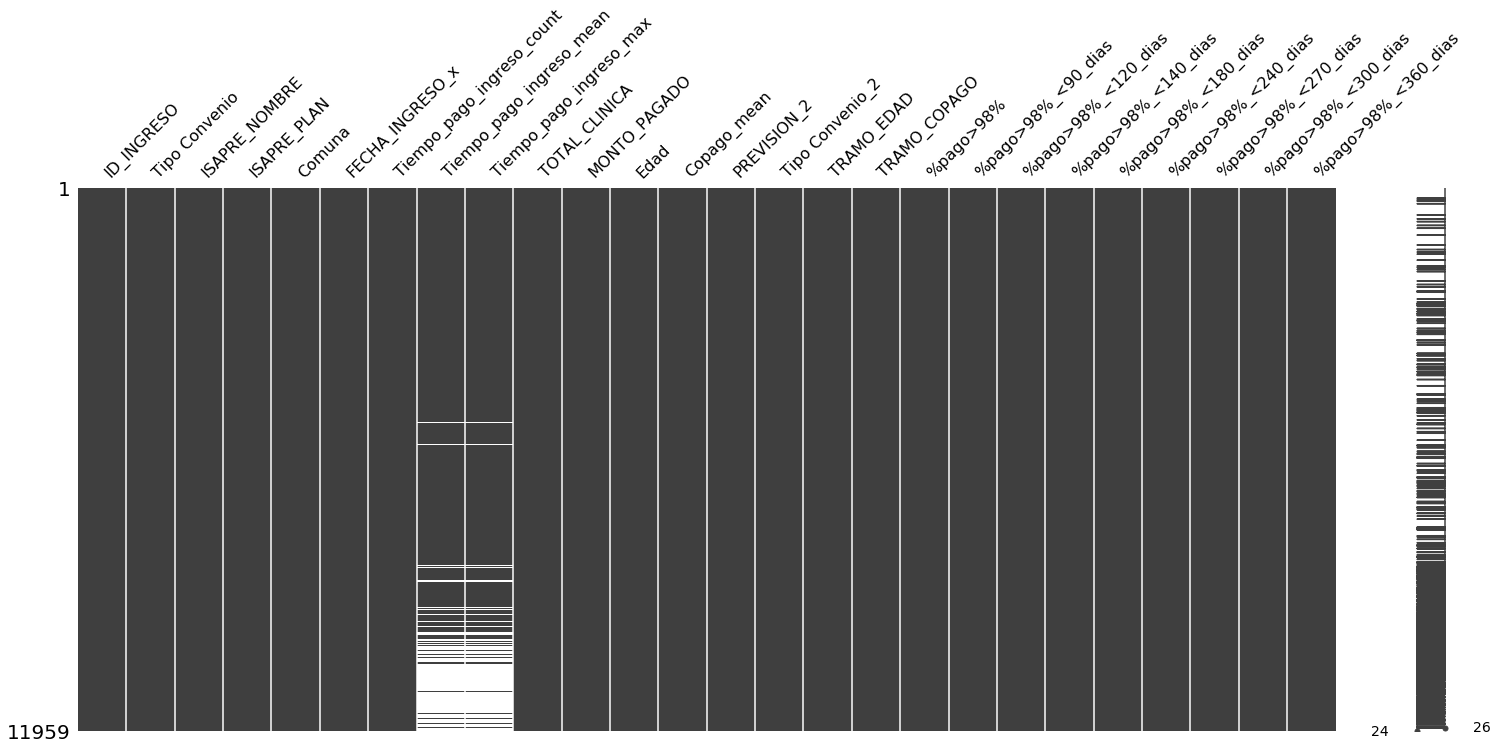

In [190]:
# analisis perdidos

plt.figure(figsize=(4,4))
msngo.matrix(df_clean)


In [191]:
df_clean=df_clean.drop(['Tiempo_pago_ingreso_count', 'Tiempo_pago_ingreso_mean', 'Tiempo_pago_ingreso_max'], axis=1)

In [192]:
df_clean=df_clean.dropna()

In [193]:
df_clean.isnull().sum(axis = 0)

ID_INGRESO             0
Tipo Convenio          0
ISAPRE_NOMBRE          0
ISAPRE_PLAN            0
Comuna                 0
FECHA_INGRESO_x        0
TOTAL_CLINICA          0
MONTO_PAGADO           0
Edad                   0
Copago_mean            0
PREVISION_2            0
Tipo Convenio_2        0
TRAMO_EDAD             0
TRAMO_COPAGO           0
%pago>98%              0
%pago>98%_<90_dias     0
%pago>98%_<120_dias    0
%pago>98%_<140_dias    0
%pago>98%_<180_dias    0
%pago>98%_<240_dias    0
%pago>98%_<270_dias    0
%pago>98%_<300_dias    0
%pago>98%_<360_dias    0
dtype: int64

In [194]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11959 entries, 3 to 34328
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_INGRESO           11959 non-null  int64         
 1   Tipo Convenio        11959 non-null  object        
 2   ISAPRE_NOMBRE        11959 non-null  object        
 3   ISAPRE_PLAN          11959 non-null  object        
 4   Comuna               11959 non-null  object        
 5   FECHA_INGRESO_x      11959 non-null  datetime64[ns]
 6   TOTAL_CLINICA        11959 non-null  float64       
 7   MONTO_PAGADO         11959 non-null  float64       
 8   Edad                 11959 non-null  float64       
 9   Copago_mean          11959 non-null  float64       
 10  PREVISION_2          11959 non-null  object        
 11  Tipo Convenio_2      11959 non-null  object        
 12  TRAMO_EDAD           11959 non-null  object        
 13  TRAMO_COPAGO         11959 non-

In [195]:
df_clean['TOTAL_CLINICA'].sum()-df_clean['MONTO_PAGADO'].sum()

6278257491.166668

In [196]:
df_clean.to_excel('C:/Users/yerko/Vitacura_DF_V4.xlsx')

In [197]:
from sklearn.utils import resample

# Datos Balanceados:

In [199]:
df_clean['%pago>98%_<300_dias'].value_counts()

0    9061
1    2898
Name: %pago>98%_<300_dias, dtype: int64

In [200]:
# Separate majority and minority classes
df_majority = df_clean[df_clean['%pago>98%_<300_dias']=='0']
df_minority = df_clean[df_clean['%pago>98%_<300_dias']=='1']
#df_majority

In [201]:

 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_balanceados = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_balanceados['%pago>98%_<300_dias'].value_counts()


1    2898
0    2898
Name: %pago>98%_<300_dias, dtype: int64

In [202]:
df_balanceados.head()

,ID_INGRESO,Tipo Convenio,ISAPRE_NOMBRE,ISAPRE_PLAN,Comuna,FECHA_INGRESO_x,TOTAL_CLINICA,MONTO_PAGADO,Edad,Copago_mean,...,TRAMO_COPAGO,%pago>98%,%pago>98%_<90_dias,%pago>98%_<120_dias,%pago>98%_<140_dias,%pago>98%_<180_dias,%pago>98%_<240_dias,%pago>98%_<270_dias,%pago>98%_<300_dias,%pago>98%_<360_dias
13381,533126,LIBRE ELECCIÓN,FONASA,BASE,SAN MIGUEL,2018-03-20,2916000.0,2916000.0,50.0,0.0,...,I,0,0,0,0,0,0,0,0,0
21211,543081,GES,PARTICULAR,PART-GESMED,LAS CONDES,2018-11-12,95773.0,95773.0,42.0,0.0,...,I,0,0,0,0,0,0,0,0,0
5936,523103,LIBRE ELECCIÓN,ISAPRE CONSALUD,CONSLESTOCK,VITACURA,2017-07-06,3087748.0,3087748.0,91.0,2286686.0,...,IV,0,0,0,0,0,0,0,0,0
26648,549953,LIBRE ELECCIÓN,ISAPRE COLMENA,COLL34,PROVIDENCIA,2019-04-24,4382045.0,4382045.0,77.0,645835.0,...,III,0,1,1,1,1,0,0,0,0
18321,539564,ONCOLÓGICO,ISAPRE CONSALUD,ONCOSALUDCONSA,PUERTO MONTT,2018-08-14,72035.0,72035.0,40.0,0.0,...,I,0,1,1,1,1,1,1,0,0


In [203]:
df_balanceados.to_excel('C:/Users/yerko/Vitacura_DF_bal_V4.xlsx')

<Figure size 288x288 with 0 Axes>

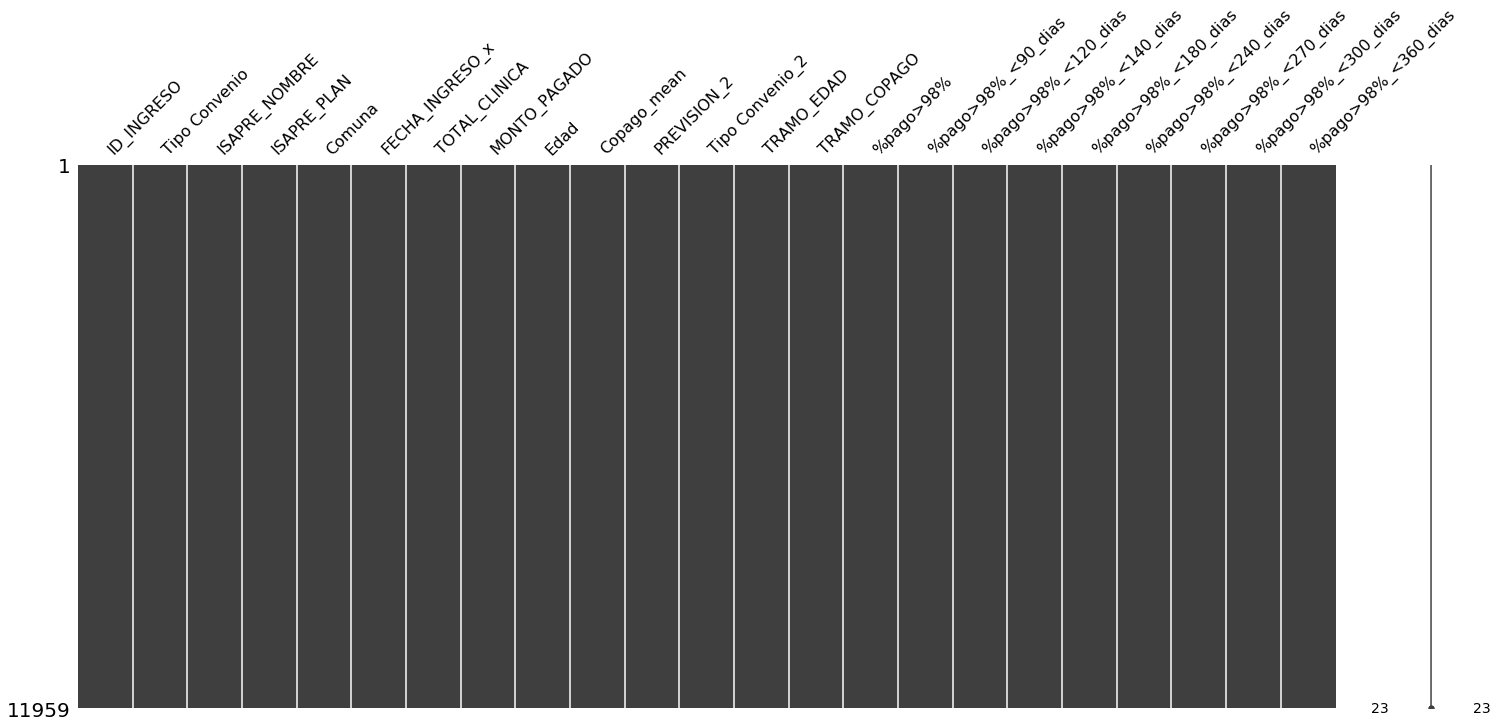

In [204]:
plt.figure(figsize=(4,4))
msngo.matrix(df_clean)

In [310]:
#df_clean.to_excel('C:/Users/yerko/df_clean_rs_RANCAGUA_3.xlsx')

In [311]:
#df_clean.to_excel('C:/Users/yerko/datos_anteriores_rancagua_V2.xlsx')

# Preparacion de Modelos

In [320]:
df_rs=df_clean

In [321]:
df_rs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11961 entries, 3 to 34328
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_INGRESO           11961 non-null  int64         
 1   Tipo Convenio        11961 non-null  object        
 2   ISAPRE_NOMBRE        11961 non-null  object        
 3   ISAPRE_PLAN          11961 non-null  object        
 4   Comuna               11961 non-null  object        
 5   FECHA_INGRESO_x      11961 non-null  datetime64[ns]
 6   TOTAL_CLINICA        11961 non-null  float64       
 7   MONTO_PAGADO         11961 non-null  float64       
 8   Edad                 11961 non-null  float64       
 9   Copago_mean          11961 non-null  float64       
 10  PREVISION_2          11961 non-null  object        
 11  Tipo Convenio_2      11961 non-null  object        
 12  TRAMO_EDAD           11961 non-null  object        
 13  TRAMO_COPAGO         11961 non-

In [322]:
df_rs=df_rs.iloc[:, [0,10,6,11,12,13,20]]

In [323]:

df_rs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11961 entries, 3 to 34328
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_INGRESO           11961 non-null  int64  
 1   PREVISION_2          11961 non-null  object 
 2   TOTAL_CLINICA        11961 non-null  float64
 3   Tipo Convenio_2      11961 non-null  object 
 4   TRAMO_EDAD           11961 non-null  object 
 5   TRAMO_COPAGO         11961 non-null  object 
 6   %pago>98%_<300_dias  11961 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 747.6+ KB


In [324]:
#df_rs.to_excel('C:/Users/yerko/df_rs_RRRR11.xlsx')

# Modelo de Regresion Logistica

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

## Separar datos de entrenamiento y prueba:

In [326]:
X=df_rs.iloc[:, [1,2,3,4,5]]
y=df_rs.iloc[:, [6]]


In [327]:
X

,PREVISION_2,TOTAL_CLINICA,Tipo Convenio_2,TRAMO_EDAD,TRAMO_COPAGO
3,ISAPRE BANMEDICA SA,8179566.0,LIBRE ELECCIÓN,18-30,IV
6,CRUZ BLANCA S.A.,1379967.0,ONCOLÓGICO,40-50,I
8,ISAPRE CONSALUD S.A.,730084.0,ONCOLÓGICO,40-50,I
9,FONASA,1063334.0,LIBRE ELECCIÓN,40-50,III
14,CRUZ BLANCA S.A.,2003330.0,LIBRE ELECCIÓN,18-30,III
...,...,...,...,...,...
34323,PARTICULAR,25000.0,GES,60-70,I
34325,ISAPRE CONSALUD S.A.,99754.0,ONCOLÓGICO,60-70,I
34326,ISAPRE CONSALUD S.A.,218150.0,ONCOLÓGICO,18-30,I
34327,ISAPRE CONSALUD S.A.,203174.0,ONCOLÓGICO,30-40,I


In [328]:
y

,%pago>98%_<300_dias
3,0
6,0
8,0
9,0
14,0
...,...
34323,1
34325,1
34326,1
34327,1


In [329]:
df_rs=df_rs.iloc[:, [0,1,2,3,4,5,6]]

In [330]:
df_rs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11961 entries, 3 to 34328
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_INGRESO           11961 non-null  int64  
 1   PREVISION_2          11961 non-null  object 
 2   TOTAL_CLINICA        11961 non-null  float64
 3   Tipo Convenio_2      11961 non-null  object 
 4   TRAMO_EDAD           11961 non-null  object 
 5   TRAMO_COPAGO         11961 non-null  object 
 6   %pago>98%_<300_dias  11961 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 747.6+ KB


In [331]:
features = list(set(df_rs.columns.values) - set(['ID_INGRESO', '%pago>98%_<300_dias']))
features

['TRAMO_COPAGO',
 'PREVISION_2',
 'TOTAL_CLINICA',
 'TRAMO_EDAD',
 'Tipo Convenio_2']

In [332]:
features = list(set(df_rs.columns.values) - set(['ID_INGRESO', '%pago>98%_<300_dias']))
cat_features = [feat for feat in features if df_rs[feat].dtype.name in ['category', 'object']]
num_features = list(set(features) - set(cat_features))

print(f"Categorical features: \n {cat_features}")
print(f"Numerical features: \n {num_features}")

Categorical features: 
 ['TRAMO_COPAGO', 'PREVISION_2', 'TRAMO_EDAD', 'Tipo Convenio_2']
Numerical features: 
 ['TOTAL_CLINICA']


In [333]:
data = pd.get_dummies(df_rs, drop_first = True, columns = cat_features) # el parámetro drop first elimina uno de los valores, tal y como queremos que suceda

# volvemos a calcular los features, ya que el nombre de algunas columnas ha cambiado
features = list(set(data.columns.values) - set(['ID_INGRESO', '%pago>98%_<300_dias']))

# separamos otra vez el train del test (el test serán aquellas observaciones para las que el target es NA)
train = data.loc[np.logical_not(data['%pago>98%_<300_dias'].isna())]
test = data.loc[data['%pago>98%_<300_dias'].isna()]

train.head()

,ID_INGRESO,TOTAL_CLINICA,%pago>98%_<300_dias,TRAMO_COPAGO_II,TRAMO_COPAGO_III,TRAMO_COPAGO_IV,TRAMO_COPAGO_V,PREVISION_2_FONASA,PREVISION_2_ISAPRE BANMEDICA SA,PREVISION_2_ISAPRE COLMENA GOLDEN CROSS S.A.,...,TRAMO_EDAD_40-50,TRAMO_EDAD_50-60,TRAMO_EDAD_60-70,TRAMO_EDAD_70<,Tipo Convenio_2_GRD,Tipo Convenio_2_LIBRE ELECCIÓN,Tipo Convenio_2_ONCOLÓGICO,Tipo Convenio_2_OTRO,Tipo Convenio_2_PAD FONASA,Tipo Convenio_2_PREFERENTE
3,515810,8179566.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,515815,1379967.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,515818,730084.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9,515819,1063334.0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
14,515827,2003330.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [334]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification


In [335]:
#data1.to_excel('C:/Users/yerko/data_rs22.xlsx')

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11961 entries, 3 to 34328
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID_INGRESO                                    11961 non-null  int64  
 1   TOTAL_CLINICA                                 11961 non-null  float64
 2   %pago>98%_<300_dias                           11961 non-null  object 
 3   TRAMO_COPAGO_II                               11961 non-null  uint8  
 4   TRAMO_COPAGO_III                              11961 non-null  uint8  
 5   TRAMO_COPAGO_IV                               11961 non-null  uint8  
 6   TRAMO_COPAGO_V                                11961 non-null  uint8  
 7   PREVISION_2_FONASA                            11961 non-null  uint8  
 8   PREVISION_2_ISAPRE BANMEDICA SA               11961 non-null  uint8  
 9   PREVISION_2_ISAPRE COLMENA GOLDEN CROSS S.A.  11961 non-null 

In [337]:
data1=data.iloc[:, 1:len(data)]
data1

,TOTAL_CLINICA,%pago>98%_<300_dias,TRAMO_COPAGO_II,TRAMO_COPAGO_III,TRAMO_COPAGO_IV,TRAMO_COPAGO_V,PREVISION_2_FONASA,PREVISION_2_ISAPRE BANMEDICA SA,PREVISION_2_ISAPRE COLMENA GOLDEN CROSS S.A.,PREVISION_2_ISAPRE CONSALUD S.A.,...,TRAMO_EDAD_40-50,TRAMO_EDAD_50-60,TRAMO_EDAD_60-70,TRAMO_EDAD_70<,Tipo Convenio_2_GRD,Tipo Convenio_2_LIBRE ELECCIÓN,Tipo Convenio_2_ONCOLÓGICO,Tipo Convenio_2_OTRO,Tipo Convenio_2_PAD FONASA,Tipo Convenio_2_PREFERENTE
3,8179566.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,1379967.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,730084.0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
9,1063334.0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
14,2003330.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34323,25000.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
34325,99754.0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
34326,218150.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
34327,203174.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [338]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11961 entries, 3 to 34328
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   TOTAL_CLINICA                                 11961 non-null  float64
 1   %pago>98%_<300_dias                           11961 non-null  object 
 2   TRAMO_COPAGO_II                               11961 non-null  uint8  
 3   TRAMO_COPAGO_III                              11961 non-null  uint8  
 4   TRAMO_COPAGO_IV                               11961 non-null  uint8  
 5   TRAMO_COPAGO_V                                11961 non-null  uint8  
 6   PREVISION_2_FONASA                            11961 non-null  uint8  
 7   PREVISION_2_ISAPRE BANMEDICA SA               11961 non-null  uint8  
 8   PREVISION_2_ISAPRE COLMENA GOLDEN CROSS S.A.  11961 non-null  uint8  
 9   PREVISION_2_ISAPRE CONSALUD S.A.              11961 non-null 

In [339]:

#dataset = pd.read_csv('C:/Users/yerko/data_rs.xlsx')
dataset=data1
#df_rs
clase_name = '%pago>98%_<300_dias' # nombre de variable a predecir
headers = dataset.columns.values.tolist()
headers.remove(clase_name)
clase   = dataset[clase_name].tolist() # array con variable a predecir
clase   = np.array(clase)
dataset = dataset.drop(clase_name,1)



In [340]:
# CONVIERTE DATA.FRAME EN MATRIZ npy
# -------------------------------------------------------------------
#dataset = dataset.drop(clase_name,1) # borra la clase del data set
dataset = dataset.to_numpy() # convierte en matriz
dataset = np.matrix(dataset) # convierte en matriz npy

# MODELO
# -------------------------------------------------------------------
model = ExtraTreesClassifier()
model.fit(dataset, clase)


# IMPORTANCIA VARIABLES
# -------------------------------------------------------------------
var_imp = pd.DataFrame({
 'feature':headers, 
 'v_importance':model.feature_importances_.tolist()
 })
print (var_imp.sort_values(by = 'v_importance', ascending=False))

                                         feature  v_importance
0                                  TOTAL_CLINICA      0.553401
4                                 TRAMO_COPAGO_V      0.124296
3                                TRAMO_COPAGO_IV      0.082835
10                        PREVISION_2_PARTICULAR      0.051971
2                               TRAMO_COPAGO_III      0.031493
21                    Tipo Convenio_2_PREFERENTE      0.019701
18                    Tipo Convenio_2_ONCOLÓGICO      0.018372
1                                TRAMO_COPAGO_II      0.018236
8               PREVISION_2_ISAPRE CONSALUD S.A.      0.017336
17                Tipo Convenio_2_LIBRE ELECCIÓN      0.015252
15                                TRAMO_EDAD_70<      0.014001
14                              TRAMO_EDAD_60-70      0.007406
7   PREVISION_2_ISAPRE COLMENA GOLDEN CROSS S.A.      0.007248
11                              TRAMO_EDAD_30-40      0.006085
12                              TRAMO_EDAD_40-50      0

In [341]:
var_imp.head(10)

,feature,v_importance
0,TOTAL_CLINICA,0.553401
1,TRAMO_COPAGO_II,0.018236
2,TRAMO_COPAGO_III,0.031493
3,TRAMO_COPAGO_IV,0.082835
4,TRAMO_COPAGO_V,0.124296
5,PREVISION_2_FONASA,0.005557
6,PREVISION_2_ISAPRE BANMEDICA SA,0.004539
7,PREVISION_2_ISAPRE COLMENA GOLDEN CROSS S.A.,0.007248
8,PREVISION_2_ISAPRE CONSALUD S.A.,0.017336
9,PREVISION_2_NUEVA MASVIDA S.A.,0.003858


In [342]:
var_imp.sort_values(by = 'v_importance', ascending=False).head(30)

,feature,v_importance
0,TOTAL_CLINICA,0.553401
4,TRAMO_COPAGO_V,0.124296
3,TRAMO_COPAGO_IV,0.082835
10,PREVISION_2_PARTICULAR,0.051971
2,TRAMO_COPAGO_III,0.031493
21,Tipo Convenio_2_PREFERENTE,0.019701
18,Tipo Convenio_2_ONCOLÓGICO,0.018372
1,TRAMO_COPAGO_II,0.018236
8,PREVISION_2_ISAPRE CONSALUD S.A.,0.017336
17,Tipo Convenio_2_LIBRE ELECCIÓN,0.015252


In [343]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[features], train['%pago>98%_<300_dias'], test_size = 0.25,
                                                  stratify = train['%pago>98%_<300_dias'], random_state = 1234)

# Regresion logistica con Clases Balanceadas

In [344]:
from sklearn.linear_model import LogisticRegression

log_regressor = LogisticRegression(max_iter = 1e5,C=1.0,random_state=1,solver="newton-cg",class_weight="balanced") # en realidad la logistic regression de sklearn es regularizada, 
                                                   # pero de momento esto no es importante para el ejercicio
fit=log_regressor.fit(X = X_train, y = y_train)

In [345]:
log_regressor.coef_

array([[ 4.98819209e-01, -9.29413037e-02, -3.57871643e-01,
         2.54165433e+00,  1.10543714e+00, -2.57987598e-01,
        -2.23186421e+00, -8.77299057e-02,  5.28030474e-02,
         7.29189354e-02, -5.65379748e-02, -6.40690545e-01,
        -7.68578490e-01,  4.38834041e+00, -3.54445940e-08,
         3.09509721e-02,  7.24879304e-02, -8.55313030e-01,
         9.91585767e-02,  1.59173733e+00, -8.61439793e-01,
         3.30333458e+00]])

In [346]:
y

,%pago>98%_<300_dias
3,0
6,0
8,0
9,0
14,0
...,...
34323,1
34325,1
34326,1
34327,1


In [347]:
X = X_train
y = y_train

In [348]:
logreg = LogisticRegression()
logreg.fit(X, y)
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
TRAMO_COPAGO_V,2.978433e-14
TRAMO_COPAGO_IV,1.612666e-14
Tipo Convenio_2_PREFERENTE,4.109721e-15
Tipo Convenio_2_PAD FONASA,6.734055e-17
TRAMO_COPAGO_III,-2.870134e-16
PREVISION_2_NUEVA MASVIDA S.A.,-1.079596e-15
PREVISION_2_ISAPRE BANMEDICA SA,-4.012922e-15
PREVISION_2_ISAPRE COLMENA GOLDEN CROSS S.A.,-6.787914e-15
Tipo Convenio_2_GRD,-7.416062e-15
PREVISION_2_FONASA,-8.447971e-15


In [349]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
TRAMO_COPAGO_V,1.0
TRAMO_COPAGO_IV,1.0
Tipo Convenio_2_PREFERENTE,1.0
Tipo Convenio_2_PAD FONASA,1.0
TRAMO_COPAGO_III,1.0
PREVISION_2_NUEVA MASVIDA S.A.,1.0
PREVISION_2_ISAPRE BANMEDICA SA,1.0
PREVISION_2_ISAPRE COLMENA GOLDEN CROSS S.A.,1.0
Tipo Convenio_2_GRD,1.0
PREVISION_2_FONASA,1.0


In [350]:
from sklearn.metrics import roc_auc_score

y_pred_test = log_regressor.predict_proba(X_test)
y_pred_test = [i[1] for i in y_pred_test]

score = roc_auc_score(y_test, y_pred_test)

print(f"ROC AUC score of the model: {np.round(score, 5)}")

ROC AUC score of the model: 0.85308


In [351]:
y_pred_test = log_regressor.predict(X_test)

In [352]:
y_pred_test

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

In [353]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
m1_confusion = confusion_matrix(y_test, y_pred_test)
m1_confusion

array([[1674,  592],
       [ 146,  579]], dtype=int64)

In [354]:
y_test=y_test.astype(str).astype(int) 

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [356]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = log_regressor.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


In [357]:
roc_auc

0.8530839699303041

In [358]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
            

In [359]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

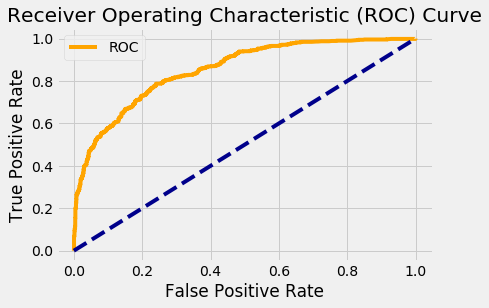

In [360]:
plot_roc_curve(fpr, tpr)